# This is a  Jupyter Notebook for Spam Message Detection

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [59]:
print("Hello World!")


Hello World!


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy
print('Hello World')

Hello World


In [61]:
df = pd.read_csv('spam.tsv', sep='\t')
# Display the first few rows
print(df.head())

  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2


In [62]:
print(df.isnull().sum());

label      0
message    0
length     0
punct      0
dtype: int64


In [63]:
print(df.shape)
df['label'].value_counts()

(5572, 4)


label
ham     4825
spam     747
Name: count, dtype: int64

In [64]:
#dataset balancing
ham=df[df['label'] == 'ham']
ham.shape


(4825, 4)

In [65]:
spam = df[df['label'] == 'spam']
spam.shape

(747, 4)

In [66]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [67]:
data=pd.concat([ham, spam], axis=0, ignore_index=True)
data.label

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
1489    spam
1490    spam
1491    spam
1492    spam
1493    spam
Name: label, Length: 1494, dtype: object

In [68]:
data.sample(5)

,label,message,length,punct
1015,spam,Free entry in 2 a weekly comp for a chance to ...,143,6
1367,spam,"Mila, age23, blonde, new in UK. I look sex wit...",158,12
932,spam,You are a winner U have been specially selecte...,145,3
235,ham,"Short But Cute : "" Be a good person , but dont...",78,12
40,ham,I can't keep going through this. It was never ...,431,18


In [69]:
#### evaluate the data
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')


In [70]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

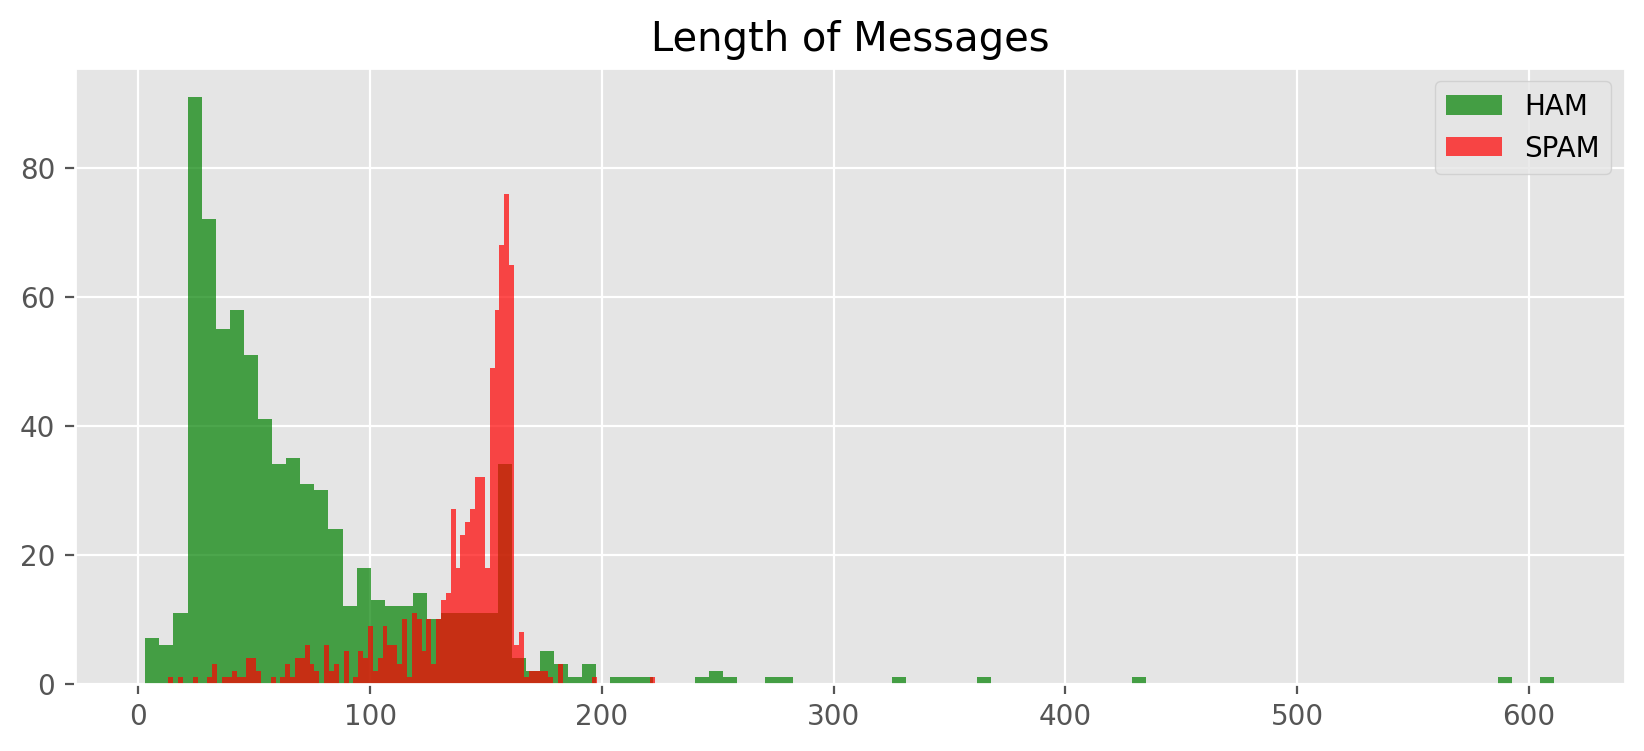

In [71]:
plt.hist(ham['length'], bins=100, color='green', alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, color='red', alpha=0.7, label='SPAM')
plt.title('Length of Messages')
plt.legend()
plt.show()

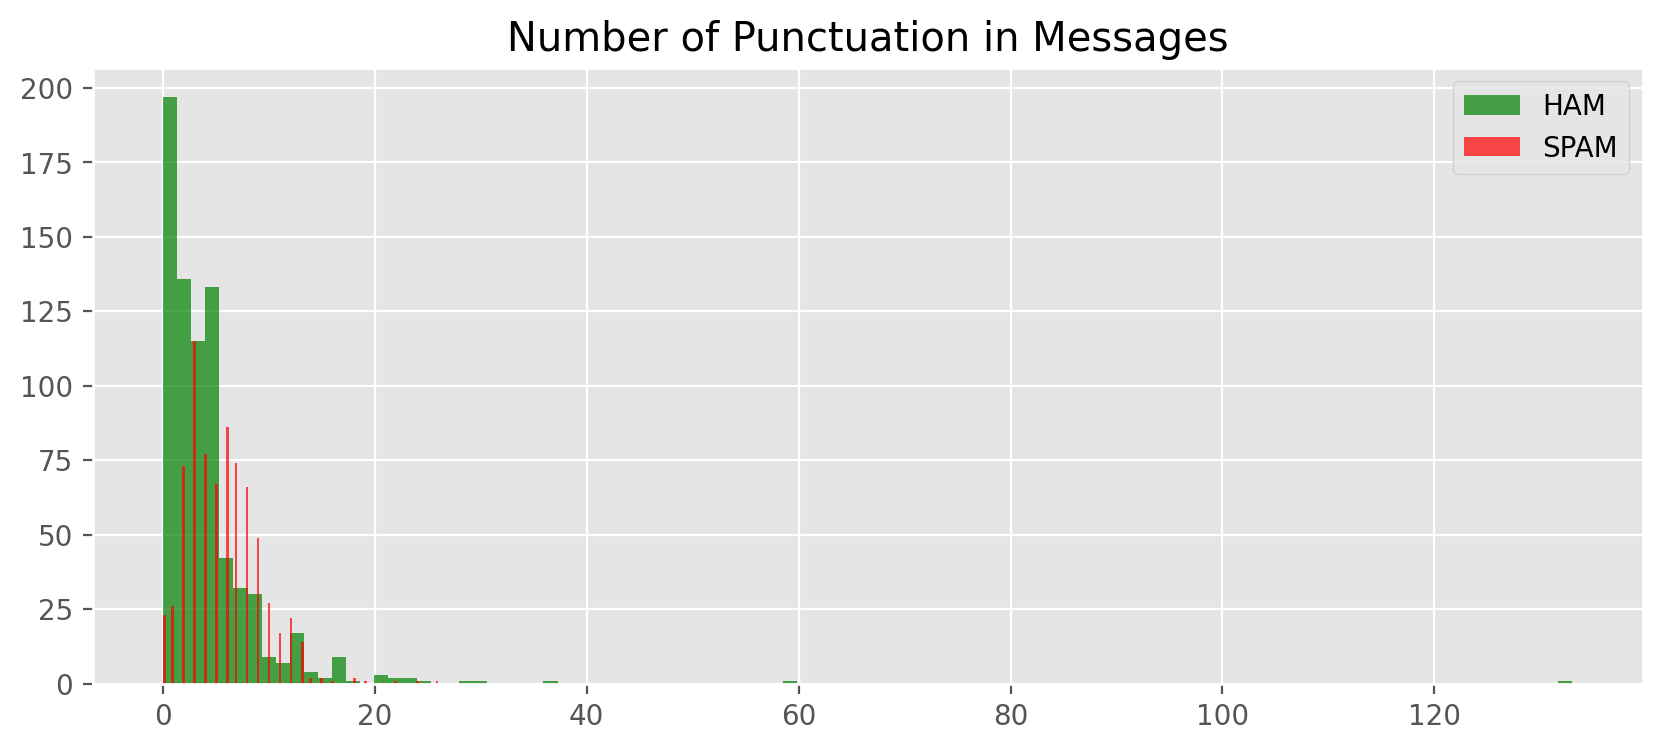

In [72]:
plt.hist(ham['punct'], bins=100, color='green', alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, color='red', alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in Messages')
plt.legend()
plt.show()

In [73]:
#### Feature Engineering
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [74]:
x_train,  x_test,y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0,shuffle=True, stratify=data['label'])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1195,), (1195,), (299,), (299,))

In [75]:
pipeline = Pipeline([('TfidfVectorizer', TfidfVectorizer()),
                     ('RandomForestClassifier', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('TfidfVectorizer', TfidfVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier(n_jobs=-1))])

In [76]:
y_pred = pipeline.predict(x_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       150
        spam       1.00      0.90      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [78]:
pipeline.predict(['Congratulations! You have won a lottery of $1000. Please contact us to claim your prize.', 'hi there, how are you?', 'your otp is 0913-12i43'])

array(['spam', 'ham', 'ham'], dtype=object)

In [79]:
import pickle
pickle.dump(pipeline, open('spam_model.pkl', 'wb'))

In [80]:
model = pickle.load(open('spam_model.pkl', 'rb'))

In [83]:
model.predict(['Congratulations! You have won a lottery of $1000. Please contact us to claim your prize.', 'hi there, how are you?', 'your otp is 0913-12i43'])

array(['spam', 'ham', 'ham'], dtype=object)